Nicolás Ruiz Pérez - 202123608

Nicolás Coca Peña  - 202111176

In [ ]:
import pandas as pd
train_data = 'https://raw.githubusercontent.com/NicolasCoca06/DataProyectoBI/main/ODScat_345.xlsx'
test_data = 'https://raw.githubusercontent.com/NicolasCoca06/DataProyectoBI/main/TestODScat_345.xlsx'

df_train = pd.read_excel(train_data)
print(df_train.head())

                                      Textos_espanol  sdg
0  Por ejemplo, el nÃºmero de consultas externas ...    3
1  En 2007, el gobierno central financió directam...    3
2  Claramente, hay muchos otros factores en juego...    3
3  Por ejemplo, el estado australiano de Victoria...    3
4  El consumo anual de alcohol se estima en 15,7 ...    3


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

nltk.download("punkt")
nltk.download("stopwords")

stps = set(stopwords.words("spanish"))
conversiones = {"á":"a","é":"e","í":"i","ó":"o","ú":"u",
                ", ":" ", ",":" ", "ñ": "n", "(":"",")":""
                ,'"':"","”":"","“":"", "®":"", "€":"", "º":"",
                "%":"", "¿":"", "?":" ", ".":" ", ":":" ", "/": " ", "-":" ",
                "www": "", "'":""}

spanish_stemmer = SnowballStemmer('spanish')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Entendimiento y preparación de los datos.

In [ ]:
count = {}
count_global = {}

ods_n = {
    3: "Salud y Bienestar",
    4: "Educación de Calidad",
    5: "Igualdad de género"
}

for x,y in zip(df_train["Textos_espanol"], df_train["sdg"]):
  if y not in count_global:
    count_global[y] = {}
  for z in x.split(" "):
    if z.lower() not in stps:
      if z not in count_global[y]:
        count_global[y][z] = 0
      count_global[y][z] += 1

for x in df_train["Textos_espanol"]:
  for y in x.split(" "):
    if y.lower() not in stps:
      if y not in count:
        count[y] = 0
      count[y] += 1

print(f'Cantidad de filas: {df_train.shape[0]}\n')
print(f'Cantidad promedio de palabras por fila: {sum(len(x.split(" ")) for x in df_train["Textos_espanol"])/df_train.shape[0] : .0f}')

print("\nPorcentaje de cada label: ")
print(round(df_train["sdg"].value_counts()/df_train.shape[0], 3) *  100)

print("\nPalabras más comúnes: ")
for x,y in sorted(list(count.items()), key = lambda x: -x[1])[:5]:
  print(f'  - "{x}", conteo: {y}')

for sdg in count_global:
  print(f'\nPalabras más comúnes para el label {sdg} ({ods_n[int(sdg)]}): ')
  for x,y in sorted(list(count_global[sdg].items()), key = lambda x: -x[1])[:5]:
    print(f'  - "{x}", conteo: {y}')

Cantidad de filas: 4049

Cantidad promedio de palabras por fila:  110

Porcentaje de cada label: 
sdg
5    35.8
4    33.4
3    30.7
Name: count, dtype: float64

Palabras más comúnes: 
  - "mujeres", conteo: 2449
  - "atención", conteo: 1172
  - "educación", conteo: 1134
  - "salud", conteo: 1131
  - "países", conteo: 1124

Palabras más comúnes para el label 3 (Salud y Bienestar): 
  - "salud", conteo: 1029
  - "atención", conteo: 1029
  - "servicios", conteo: 545
  - "países", conteo: 392
  - "pacientes", conteo: 300

Palabras más comúnes para el label 4 (Educación de Calidad): 
  - "educación", conteo: 908
  - "estudiantes", conteo: 773
  - "escuelas", conteo: 594
  - "aprendizaje", conteo: 391
  - "evaluación", conteo: 329

Palabras más comúnes para el label 5 (Igualdad de género): 
  - "mujeres", conteo: 2316
  - "género", conteo: 1055
  - "hombres", conteo: 515
  - "igualdad", conteo: 508
  - "trabajo", conteo: 414


In [ ]:
def nlp_process(df, text, target):
    def recover(data):
        split = data.split(" ")
        new = []
        for x in split:
            if "Ã" in x:
                new.append(x.encode('latin1', errors='ignore').decode('utf-8', errors='ignore'))
            else:
                new.append(x)
        return " ".join(new).strip()
    def replace_(data):
        for key in conversiones:
            data = data.replace(key, conversiones[key])
        return data.strip()
    def no_spaces(data):
        return [x.replace(" ", "") for x in data]
    def stopword_removal(data):
        return [x for x in data if x not in stps and "ã" not in x]
    def number_to_word(data):
        new = []
        for x in data:
            if x.isnumeric():
                new.append("num")
            else:
                new.append(x)
        return new
    def process_word(data):
        return [spanish_stemmer.stem(x) for x in data]
    def concact(data):
        return " ".join(data).strip()
    df_text = df[text]

    df_text = df_text.apply(recover)
    df_text = df_text.apply(str.lower)
    df_text = df_text.apply(replace_)
    df_text = df_text.apply(word_tokenize)
    df_text = df_text.apply(no_spaces)
    df_text = df_text.apply(stopword_removal)
    df_text = df_text.apply(number_to_word)
    df_text = df_text.apply(process_word)
    df_text = df_text.apply(concact)
    return df_text, df[target]

In [ ]:
X,y = nlp_process(df_train,"Textos_espanol", "sdg" )

X.head(10)

,Textos_espanol
0,ejempl numer consult extern especial num cad m...
1,num gobiern central financi direct sol num num...
2,clar factor jueg particul varied barrer determ...
3,ejempl australian victori cre agenci promocion...
4,consum anual alcohol estim num num litr ano ho...
5,prob pront medicin rural pued cre dese permane...
6,duracion medi estanci hospital alos utiliz men...
7,period retrospect num anos num num preci inclu...
8,estan vincul dat registr inclu relat mortal gr...
9,form eficaz mejor eficaci calid servici estan ...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size= 0.1)

X_train.sample(5)


,Textos_espanol
3659,funcion inclu hac recomend ​​plan program form...
3091,coeficient present figur proced regresion sepa...
207,contrari brech gener asi central meridional as...
19,norueg revision servici comunitari salud menta...
3929,mayor espiritu empresarial femenin seri benefi...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


#Modelado y evaluación.

In [ ]:
#Modelo hecho por Nicolás Ruiz Pérez
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


rdnf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10,min_samples_leaf= 1, max_depth = None, bootstrap= False  )
rdnf.fit(X_train_tfidf, y_train)

round(rdnf.score(X_test_tfidf, y_test), 2)

0.98

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

def show_confusion_matrix(model, X_test_tfidf, y_test):
  actual = y_test
  predicted = model.predict(X_test_tfidf)

  confusion_matrix = metrics.confusion_matrix(actual, predicted, labels = model.classes_)

  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = model.classes_)

  cm_display.plot()

  a = round(metrics.accuracy_score(actual, predicted),4)
  p = round(metrics.precision_score(actual, predicted, average = "weighted"),4)
  r = round(metrics.recall_score(actual, predicted, average = "weighted"),4)
  f = round(metrics.f1_score(actual, predicted, average = "weighted"),4)

  print("Accuracy score: "  + str(a))
  print(f'Precision score: {p}')
  print(f'Recall score: {r}')
  print(f'F1 score: {f}\n')

  print(metrics.classification_report(actual, predicted))

  print("\n")

  plt.show()

  return a,p,r,f

Accuracy score: 0.9753
Precision score: 0.9754
Recall score: 0.9753
F1 score: 0.9753

              precision    recall  f1-score   support

           3       0.98      0.97      0.98       125
           4       0.97      0.98      0.98       142
           5       0.97      0.98      0.97       138

    accuracy                           0.98       405
   macro avg       0.98      0.98      0.98       405
weighted avg       0.98      0.98      0.98       405





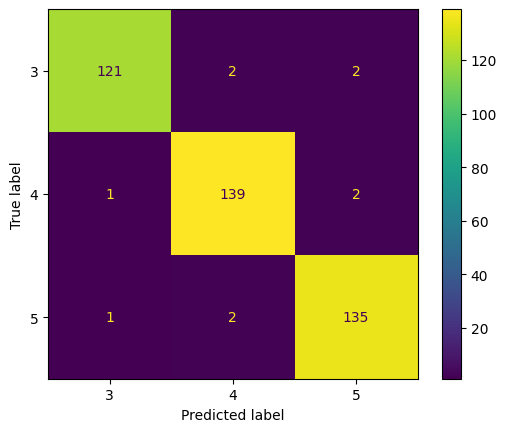

In [ ]:
a1,p1,r1,f1 = show_confusion_matrix(rdnf, X_test_tfidf, y_test )

In [ ]:
# Modelo hecho por Harold Nicolás Coca Peña
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = MultinomialNB()

nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test_tfidf)

Accuracy score: 0.9605
Precision score: 0.9611
Recall score: 0.9605
F1 score: 0.9605

              precision    recall  f1-score   support

           3       0.97      0.94      0.96       125
           4       0.97      0.96      0.96       142
           5       0.94      0.99      0.96       138

    accuracy                           0.96       405
   macro avg       0.96      0.96      0.96       405
weighted avg       0.96      0.96      0.96       405





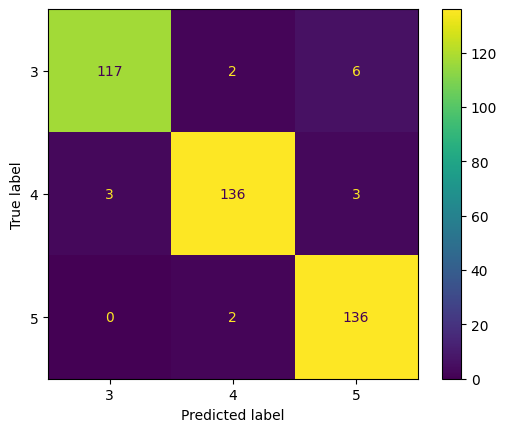

In [ ]:
a2,p2,r2,f2 = show_confusion_matrix(nb_model, X_test_tfidf, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = knn_model.predict(X_test_tfidf)

In [ ]:
accuracy_score(y_test, y_pred)

0.945679012345679

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
grid_search.best_params_['n_neighbors']

9

Accuracy score: 0.9457
Precision score: 0.9471
Recall score: 0.9457
F1 score: 0.9457

              precision    recall  f1-score   support

           3       0.92      0.98      0.95       125
           4       0.93      0.95      0.94       142
           5       0.98      0.91      0.95       138

    accuracy                           0.95       405
   macro avg       0.95      0.95      0.95       405
weighted avg       0.95      0.95      0.95       405





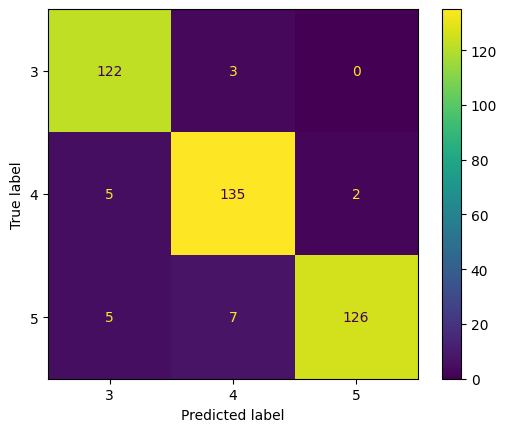

In [ ]:
a3,p3,r3,f3 = show_confusion_matrix(knn_model, X_test_tfidf, y_test)

In [ ]:
score_comparison = pd.DataFrame([["Random Forest", a1,p1,r1, f1], ["Multinomial NB", a2,p2,r2,f2],["KNN", a3,p3,r3,f3]], columns = ["Model", "Accuracy", "Precision","Recall" ,"F1"])

score_comparison

,Model,Accuracy,Precision,Recall,F1
0,Random Forest,0.9753,0.9754,0.9753,0.9753
1,Multinomial NB,0.9605,0.9611,0.9605,0.9605
2,KNN,0.9457,0.9471,0.9457,0.9457


In [ ]:
def get_most_important_features(model):
  importancias = model.feature_importances_
  palabras = vectorizer.get_feature_names_out()

  palabras_importantes = sorted(zip(importancias, palabras), reverse=True)

  for x,y in palabras_importantes[:10]:
    print(f'Palabra: {y}, importancia: {x: .2f}')

In [34]:
vectorizer_final = TfidfVectorizer()
X_tfidf = vectorizer_final.fit_transform(X).toarray()

rdnf_final = RandomForestClassifier(n_estimators = 100, min_samples_split = 10,min_samples_leaf= 1, max_depth = None, bootstrap= False  )
rdnf_final.fit(X_tfidf, y)

RandomForestClassifier(bootstrap=False, min_samples_split=10)

In [39]:
get_most_important_features(rdnf_final)

Palabra: mujer, importancia:  0.06
Palabra: educ, importancia:  0.04
Palabra: gener, importancia:  0.04
Palabra: salud, importancia:  0.04
Palabra: estudi, importancia:  0.02
Palabra: escuel, importancia:  0.02
Palabra: medic, importancia:  0.02
Palabra: hombr, importancia:  0.02
Palabra: atencion, importancia:  0.02
Palabra: pacient, importancia:  0.01


In [36]:
def generate_predicted_file(df_test, model):
  X,y = nlp_process(df_test, "Textos_espanol", "Textos_espanol")

  X = vectorizer_final.transform(X)

  predicted = model.predict(X)

  df_test["sdg"] = predicted

  df_test.to_excel("predicted.xlsx")

In [37]:
df_test = pd.read_excel(test_data)
generate_predicted_file(df_test, rdnf_final)
df_test

,Textos_espanol,sdg
0,Han examinado la contribuciÃ³n de las univers...,4
1,"En la última década, y en particular desde 201...",3
2,¿En qué países los estudiantes de alto rendimi...,4
3,A raíz de su preocupación por el hecho de que ...,3
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño nú...",4
...,...,...
697,O puede darse de baja llamando a XXXXXXX o vis...,3
698,Considere establecer o fortalecer la capacidad...,5
699,Varios líderes escolares habían decidido un te...,4
700,"Cada vez con más frecuencia, los traficantes d...",3
